## Problem 6

In [91]:
import numpy as np
import matplotlib.pyplot as plt

num_sample = 100
iteration = 1000
lr = 0.01

#### a) using log-derivate trick.  
  
First of all, define function to be minimized and gradients. This can be done by log-derivative trick.  
To fit the condition $\sigma > 0$, we substitute $\sigma = \exp(\tau)$ and fit $\tau$.

In [92]:
def f(x, mu, tau):
    return x*np.sin(x) + (mu-1)**2/2 + np.exp(tau) - tau

def grad_mu(x, mu, tau):
    sigma = np.exp(tau)
    return x*np.sin(x)*(x-mu)/sigma**2 + mu-1

def grad_tau(x, mu, tau):
    sigma = np.exp(tau)
    return (x*np.sin(x)*((x-mu)**2/sigma**3 - np.sqrt(2*np.pi)) + 1 - 1/sigma) * sigma

Choose $\mu$ and $\tau$ from uniform distribution.  
Each sample $X \sim \mathcal{N}(\mu, \sigma^2)$ is chosen randomly. This is a typical Monte Carlo.

In [99]:
mu, tau = np.random.uniform(-2,2,size=2)
mu_hist, tau_hist = np.zeros((iteration,)), np.zeros((iteration,))

for i in range(iteration):
    sigma = np.exp(tau)
    X = np.random.normal(mu, sigma, (num_sample,))     # using 'one' batch sample
    
    mu -= lr*np.mean(grad_mu(X, mu, tau))
    tau -= lr*np.mean(grad_tau(X, mu, tau))
    
    mu_hist[i] = mu
    tau_hist[i] = tau

The final(trained) statistics and flows of function's value under training is described below.

mean : 0.28,    std : 0.64


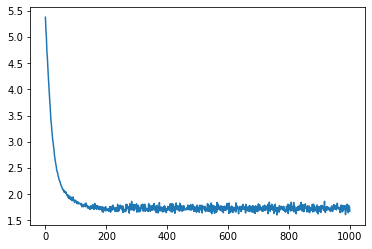

In [100]:
ran = np.arange(iteration)
val = np.zeros((iteration,))

for i in range(iteration):
    mu = mu_hist[i]
    tau = tau_hist[i]; sigma = np.exp(tau)
    X = np.random.normal(mu, sigma, size=(num_sample,))
    
    val[i] = np.mean(f(X,mu,tau))

print(f"mean : {mu_hist[-1]:.2f},    std : {np.exp(tau_hist[-1]):.2f}")
plt.plot(ran,val)

#### b) the reparametriztion trick.

Everything is same, except that we use the following equation
$$
    \mathcal{N}(\mu, \sigma^2) = \mu + \sigma\mathcal{N}(0, 1).
$$
This changes gradient functions.

In [95]:
def grad_mu(y, mu, tau):
    sigma = np.exp(tau)
    return np.sin(mu + sigma*y) + (mu + sigma*y)*np.cos(mu + sigma*y) + mu - 1

def grad_tau(y, mu ,tau):
    sigma = np.exp(tau)
    return (y*np.sin(mu + sigma*y) + y*(mu + sigma*y)*np.cos(mu + sigma*y) + 1 - 1/sigma) * sigma

In [96]:
mu, tau = np.random.uniform(-2,2,size=2)
mu_hist, tau_hist = np.zeros((iteration,)), np.zeros((iteration,))

for i in range(iteration):
    sigma = np.exp(tau)
    X = np.random.normal(mu, sigma, (num_sample,))     # using 'one' batch sample
    
    mu -= lr*np.mean(grad_mu(X, mu, tau))
    tau -= lr*np.mean(grad_tau(X, mu, tau))
    
    mu_hist[i] = mu
    tau_hist[i] = tau

The results are following.

mean : 0.28,    std : 0.65


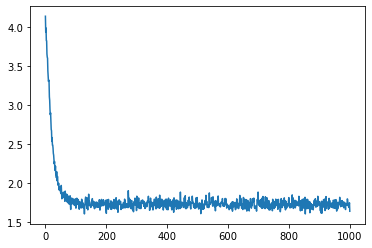

In [97]:
ran = np.arange(iteration)
val = np.zeros((iteration,))

for i in range(iteration):
    mu = mu_hist[i]
    tau = tau_hist[i]; sigma = np.exp(tau)
    X = np.random.normal(mu, sigma, size=(num_sample,))
    
    val[i] = np.mean(f(X,mu,tau))

print(f"mean : {mu_hist[-1]:.2f},    std : {np.exp(tau_hist[-1]):.2f}")
plt.plot(ran,val)